In [1]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from scipy.stats import chi2

from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
combined = [df_train,df_test]
# for visualization purpose, we trim down the training sample to 1% of the size of the original sample #
#df_train_short = df_train.sample(frac=0.01, random_state=200)

In [3]:
#df_train['trip_duration_log'] = np.log(df_train['trip_duration'])
#df_train = df_train.drop('trip_duration',axis=1)
for dataset in combined:
    dataset['latdiff'] = dataset['dropoff_latitude'] - dataset['pickup_latitude']
    dataset['longdiff'] = dataset['dropoff_longitude'] - dataset['pickup_longitude']
    dataset['dist'] = dataset['latdiff'].abs() + dataset['longdiff'].abs()

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


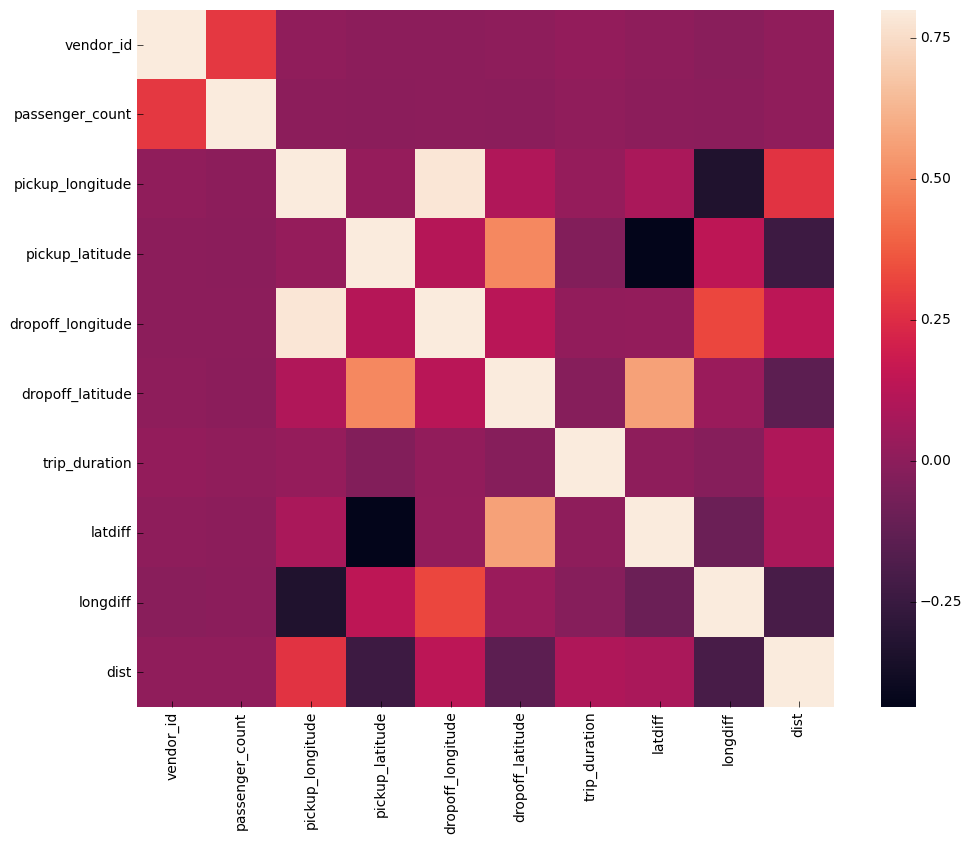

In [4]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


In [5]:
#k = 10 #number of variables for heatmap
#cols = corrmat.nlargest(k, 'trip_duration_log')['trip_duration_log'].index
#cm = np.corrcoef(df_train[cols].values.T)
#sns.set(font_scale=1.25)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

In [6]:
#df_train['pickup_long_band'] = pd.cut(df_train['pickup_longitude'],5)
# it is not a coincidence when the sample is this big #
# however it does not correlate much with the trip duration...
df_train[['vendor_id', 'passenger_count']].groupby(['vendor_id'],as_index=False).mean().sort_values(by='passenger_count',ascending=True)

,vendor_id,passenger_count
0,1,1.259402
1,2,2.016720


In [7]:
#combined = [df_train,df_test]

In [8]:
for dataset in combined:
    dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')

In [9]:
for dataset in combined:
    dataset['pickup_time'] = pd.to_datetime(dataset['pickup_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour

In [10]:
for dataset in combined:
    dataset['pickup_weekday'] = pd.to_datetime(dataset['pickup_datetime'],format='%Y-%m-%d %H:%M:%S').dt.weekday

In [11]:
df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

In [12]:
# duration is in the training sample #
#df_train['duration'] = df_train['dropoff_datetime'] - df_train['pickup_datetime']

In [13]:
# latitude difference and longitude difference would be the major factors #
# IF there's a block that is particularly heavy in traffic, their durations will become outliers #

In [14]:
#for dataset in combined:
#    dataset['latdiff'] = dataset['dropoff_latitude'] - dataset['pickup_latitude']
#    dataset['longdiff'] = dataset['dropoff_longitude'] - dataset['pickup_longitude']

In [15]:
#for dataset in combined:
#    dataset['dist'] = dataset['latdiff'].abs() + dataset['longdiff'].abs()
#assuming the roads are (more or less) in grid-shape, the distance traveled is prop to latdiff+longdiff

In [16]:
# removing trip duration outliers #
q = df_train["trip_duration"].quantile(0.999)
df_train_tr1 = df_train[ (df_train['store_and_fwd_flag']=='Y')&(df_train['vendor_id']==1)].copy()
df_train_tr2 = df_train[ (df_train['store_and_fwd_flag']=='Y')&(df_train['vendor_id']==2)].copy()
q
#max(df_train_tr2['trip_duration'])
#& (df_train['store_and_fwd_flag']=='N')
#(df_train["trip_duration"] < q) &

85128.35700000008

In [17]:
df_train[df_train['trip_duration']>q]
# 0.2% of the distribution : 2918 samples, some of them are over a day of ride #

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latdiff,longdiff,dist,pickup_time,pickup_weekday
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149,-0.000031,0.013962,0.013992,18,5
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352,-0.033936,-0.026077,0.060013,12,1
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,86236,-0.014503,-0.010994,0.025497,0,5
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,N,85197,0.014519,0.016754,0.031273,11,4
5104,id3354426,2,2016-05-05 15:18:41,2016-05-06 15:11:07,1,-73.989037,40.773514,-73.980682,40.781521,N,85946,0.008007,0.008354,0.016361,15,3
6513,id0067152,2,2016-02-27 21:04:05,2016-02-28 21:03:22,5,-73.993744,40.727444,-74.001335,40.729244,N,86357,0.001801,-0.007591,0.009392,21,5
8511,id3013398,2,2016-05-17 12:43:48,2016-05-18 12:38:03,2,-74.002625,40.733620,-73.994484,40.750603,N,86055,0.016983,0.008141,0.025124,12,1
10146,id1148048,2,2016-06-04 14:22:55,2016-06-05 14:19:45,2,-74.002357,40.739872,-74.001556,40.746593,N,86210,0.006721,0.000801,0.007523,14,5
11666,id3375271,2,2016-05-20 11:38:47,2016-05-21 11:24:31,2,-73.969818,40.797249,-73.940460,40.819569,N,85544,0.022320,0.029358,0.051678,11,4
15063,id0222074,2,2016-06-26 11:55:51,2016-06-27 11:54:26,3,-74.015297,40.704903,-73.989761,40.757359,N,86315,0.052456,0.025536,0.077991,11,6


In [18]:
df_train[(df_train['store_and_fwd_flag']=='Y')&(df_train["trip_duration"] > q)]
# these are outliers where the distance is small while duration is long : 
# given the second condition, the distance would normally be over 0.5, while none of the datapoints are. #
# also, they are all from vendor 1.
# does this mean that cleaning up the store_and_fwd flag will clean up the correlation? #

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latdiff,longdiff,dist,pickup_time,pickup_weekday


In [19]:
df_train[(df_train['store_and_fwd_flag']=='Y')]
# 8045 stored flag #
# these are outliers where the distance is small while duration is long : 
# given the second condition, the distance would normally be over 0.5, while none of the datapoints are. #
# also, they are all from vendor 1.
# does this mean that cleaning up the store_and_fwd flag will clean up the correlation? #

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latdiff,longdiff,dist,pickup_time,pickup_weekday
348,id1633648,1,2016-06-20 14:19:16,2016-06-20 14:34:34,1,-73.977905,40.754871,-73.952774,40.768166,Y,918,0.013294,0.025131,0.038425,14,0
491,id2042535,1,2016-02-12 12:36:38,2016-02-12 12:47:07,1,-73.978981,40.756519,-73.992165,40.749203,Y,629,-0.007317,-0.013184,0.020500,12,4
610,id0909228,1,2016-05-08 15:02:28,2016-05-08 15:17:54,1,-73.988510,40.742935,-74.010620,40.723507,Y,926,-0.019428,-0.022110,0.041538,15,6
774,id3697489,1,2016-01-13 13:53:29,2016-01-13 14:08:21,1,-73.948982,40.781578,-73.982346,40.778923,Y,892,-0.002655,-0.033363,0.036018,13,2
846,id1026973,1,2016-06-25 21:53:30,2016-06-25 22:05:27,1,-73.982628,40.762341,-73.995537,40.749779,Y,717,-0.012562,-0.012909,0.025471,21,5
854,id1872397,1,2016-06-05 11:44:54,2016-06-05 11:56:31,1,-73.948029,40.774792,-73.965942,40.765343,Y,697,-0.009449,-0.017914,0.027363,11,6
1014,id3003058,1,2016-05-08 02:32:00,2016-05-08 03:07:13,1,-73.996353,40.766544,-73.936417,40.693886,Y,2113,-0.072659,0.059937,0.132595,2,6
1031,id1211472,1,2016-05-12 14:11:19,2016-05-12 15:03:16,1,-73.951576,40.791344,-73.789146,40.641678,Y,3117,-0.149666,0.162430,0.312096,14,3
1115,id2453193,1,2016-03-19 11:25:03,2016-03-19 11:31:08,4,-73.977554,40.752651,-73.988174,40.757229,Y,365,0.004578,-0.010620,0.015198,11,5
1336,id0775739,1,2016-03-24 16:05:47,2016-03-24 16:18:23,1,-73.980995,40.733528,-73.965248,40.754742,Y,756,0.021214,0.015747,0.036961,16,3


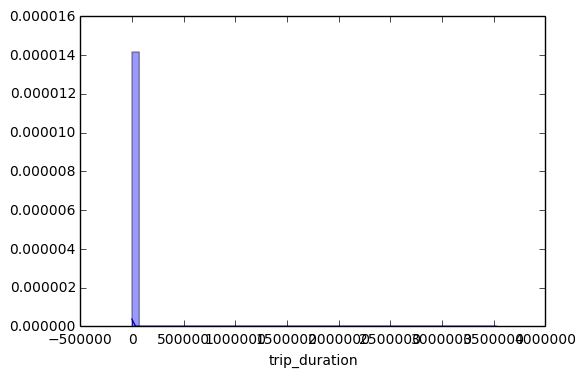

In [20]:
g = sns.distplot(df_train['trip_duration'])
#g.set(xlim=(0,5000))
# log normal distribution #

In [21]:
df_train['trip_duration_log'] = np.log(df_train['trip_duration'])
df_train_tr1['trip_duration_log'] = np.log(df_train_tr1['trip_duration'])
df_train_tr2['trip_duration_log'] = np.log(df_train_tr2['trip_duration'])

In [22]:
qdist_h = df_train["dist"].quantile(0.999)
qdist_l = df_train["dist"].quantile(0.0000001)

df_train_tr = df_train[(qdist_l<df_train['dist']) & (df_train['dist']<qdist_h)]

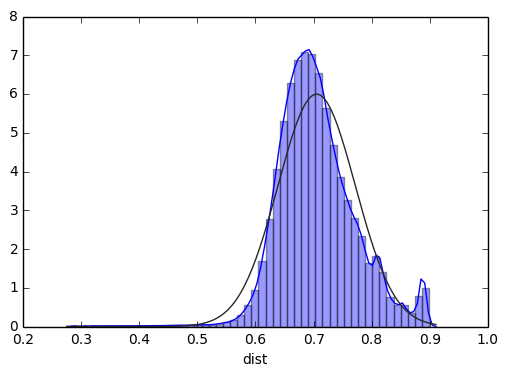

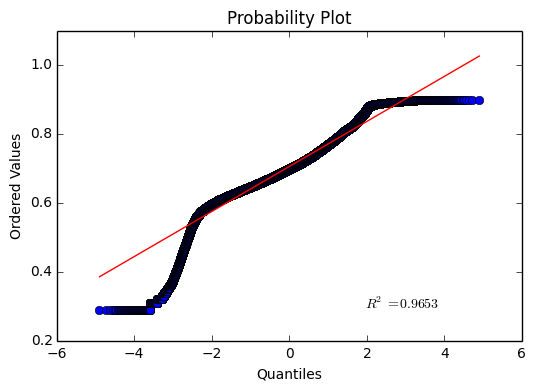

In [23]:
sns.distplot(np.power(df_train_tr['dist'],0.1),fit=norm)
fig = plt.figure()
res = stats.probplot(np.power(df_train_tr['dist'],0.1), plot=plt)

# not a good fit! #
# **0.1 -> R^2 = 0.9653
# log -> R^2 = 0.9451

In [24]:
for dataset in combined:
    dataset['dist'] = np.power(dataset['dist'],0.1)

In [25]:
#df_train['trip_duration_tr'] = df_train.loc[(df_train['trip_duration']<q),'trip_duration']
#df_train['trip_duration_tr'].isnull().any().any()

In [26]:
#sns.distplot(df_train_tr1['trip_duration_log'],fit=norm);
#fig = plt.figure()
#res = stats.probplot(df_train_tr1['trip_duration_log'], plot=plt)

In [27]:
#sns.distplot(df_train_tr2['trip_duration_log'],fit=norm);
#fig = plt.figure()
#res = stats.probplot(df_train_tr2['trip_duration_log'], plot=plt)
# so it is vendor_id == 2, 0.998< <0.999 guys that does not follow the relation well...

In [28]:
#var = 'dist'
#data = pd.concat([df_train_tr1['trip_duration'], df_train_tr1[var]], axis=1)
#data2 = pd.concat([df_train_tr2['trip_duration'], df_train_tr2[var]], axis=1)

#data.plot.scatter(x=var,y='trip_duration', xlim = (0,1), ylim=(0,10000));
#data2.plot.scatter(x=var, y='trip_duration', xlim = (0,1), ylim=(0,10000));

# vertical feature around dist = 0.3
# near zero distance, huge trip_duration


In [29]:
#var = 'longdiff'
#data = pd.concat([df_train['trip_duration'], df_train[var]], axis=1)
#data.plot.scatter(x=var, y='trip_duration', xlim=(-0.5,0.5),ylim=(0,5000));

In [30]:
df_train[['vendor_id', 'trip_duration']].groupby(['vendor_id'], as_index=False).mean()
# does this indicate that depending on the vendor a long-dist / short-dist riders are separable?

,vendor_id,trip_duration
0,1,845.438244
1,2,1058.643164


(array([ 119791.,   36687.,   48250.,  190316.,  133913.,  143346.,
         210416.,  167083.,  174380.,  234462.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

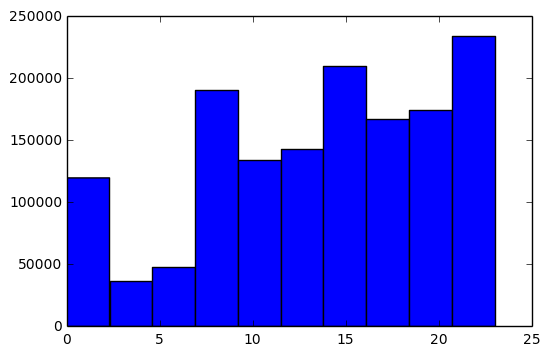

In [31]:
# create a pickup-time band (to take into account e.g. rush hour) #
# see how trip_duration changes based on that #
plt.hist(df_train['pickup_time'],bins=10)

In [32]:
df_train['pickuptime_band']=pd.cut(df_train['pickup_time'],10)

In [33]:
df_train[['pickuptime_band', 'trip_duration']].groupby(['pickuptime_band'],as_index=False).mean().sort_values(by='pickuptime_band',ascending=True)

,pickuptime_band,trip_duration
0,"(-0.023, 2.3]",914.971350
1,"(2.3, 4.6]",903.804699
2,"(4.6, 6.9]",805.165720
3,"(6.9, 9.2]",900.636830
4,"(9.2, 11.5]",950.274103
5,"(11.5, 13.8]",1012.835705
6,"(13.8, 16.1]",1091.810827
7,"(16.1, 18.4]",1004.012467
8,"(18.4, 20.7]",887.175444
9,"(20.7, 23.0]",946.447812


In [34]:
df_train['pickup_long_band'] = pd.cut(df_train['pickup_longitude'],5)
df_train[['pickup_long_band', 'trip_duration']].groupby(['pickup_long_band'],as_index=False).mean().sort_values(by='pickup_long_band',ascending=True)

,pickup_long_band,trip_duration
0,"(-121.994, -109.814]",802.000000
1,"(-109.814, -97.694]",NaN
2,"(-97.694, -85.575]",NaN
3,"(-85.575, -73.455]",959.511138
4,"(-73.455, -61.336]",355.022222


In [35]:
df_train.groupby(pd.cut(df_train['pickup_longitude'], 5)).count()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latdiff,longdiff,dist,pickup_time,pickup_weekday,trip_duration_log,pickuptime_band,pickup_long_band
pickup_longitude,,,,,,,,,,,,,,,,,,,
"(-121.994, -109.814]",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"(-109.814, -97.694]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(-97.694, -85.575]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(-85.575, -73.455]",1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597,1458597
"(-73.455, -61.336]",45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45


In [36]:
for dataset in combined:
    dataset.loc[dataset['pickup_longitude'] <= -85.575, 'pickup_longitude'] = 0
    dataset.loc[(dataset['pickup_longitude'] > -85.575)&(dataset['pickup_longitude'] <= 73.455), 'pickup_longitude'] = 1
    dataset.loc[dataset['pickup_longitude'] > -73.455, 'pickup_longitude'] = 2
    dataset['pickup_longitude'] = dataset['pickup_longitude'].astype(int)


In [37]:
df_train['pickup_lat_band'] = pd.cut(df_train['pickup_latitude'],25)
df_train[['pickup_lat_band', 'trip_duration']].groupby(['pickup_lat_band'],as_index=False).mean().sort_values(by='pickup_lat_band',ascending=True)

,pickup_lat_band,trip_duration
0,"(34.342, 35.061]",918.000000
1,"(35.061, 35.761]",464.000000
2,"(35.761, 36.462]",583.500000
3,"(36.462, 37.163]",NaN
4,"(37.163, 37.864]",597.500000
5,"(37.864, 38.565]",NaN
6,"(38.565, 39.266]",312.400000
7,"(39.266, 39.967]",10326.500000
8,"(39.967, 40.667]",2645.075329
9,"(40.667, 41.368]",919.102546


In [38]:
df_train.groupby(pd.cut(df_train['pickup_latitude'], 25)).count()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latdiff,longdiff,dist,pickup_time,pickup_weekday,trip_duration_log,pickuptime_band,pickup_long_band,pickup_lat_band
pickup_latitude,,,,,,,,,,,,,,,,,,,,
"(34.342, 35.061]",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"(35.061, 35.761]",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"(35.761, 36.462]",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"(36.462, 37.163]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(37.163, 37.864]",4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
"(37.864, 38.565]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(38.565, 39.266]",5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
"(39.266, 39.967]",4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
"(39.967, 40.667]",34117,34117,34117,34117,34117,34117,34117,34117,34117,34117,34117,34117,34117,34117,34117,34117,34117,34117,34117,34117


In [39]:
for dataset in combined:
    dataset.loc[dataset['pickup_latitude'] <= 39.967, 'pickup_latitude'] = 0
    dataset.loc[(dataset['pickup_latitude'] > 39.967)&(dataset['pickup_latitude'] <= 40.667), 'pickup_latitude'] = 1
    dataset.loc[(dataset['pickup_latitude'] > 40.667)&(dataset['pickup_latitude'] <= 41.368), 'pickup_latitude'] = 2
    dataset.loc[dataset['pickup_latitude'] > 41.368, 'pickup_latitude'] = 3
    dataset['pickup_latitude'] = dataset['pickup_latitude'].astype(int)


In [40]:
#df_train_tr1['dist_band'] = pd.cut(df_train_tr1['dist'],6)
#df_train_tr1[['dist_band','trip_duration']].groupby(['dist_band'],as_index=False).mean().sort_values(by='dist_band',ascending=True)

In [41]:
#df_train_tr2['dist_band'] = pd.cut(df_train_tr2['dist'],2)
#df_train_tr2[['dist_band','trip_duration']].groupby(['dist_band'],as_index=False).mean().sort_values(by='dist_band',ascending=True)

In [42]:
for dataset in combined:
    dataset.loc[dataset['pickup_time'] <= 2.3, 'pickup_time'] = 0
    dataset.loc[(dataset['pickup_time'] > 2.3) & (dataset['pickup_time'] <= 4.6), 'pickup_time'] = 1
    dataset.loc[(dataset['pickup_time'] > 4.6) & (dataset['pickup_time'] <= 6.9), 'pickup_time'] = 2
    dataset.loc[(dataset['pickup_time'] > 6.9) & (dataset['pickup_time'] <= 9.2), 'pickup_time'] = 3
    dataset.loc[(dataset['pickup_time'] > 9.2) & (dataset['pickup_time'] <= 11.5), 'pickup_time'] = 4
    dataset.loc[(dataset['pickup_time'] > 11.5) & (dataset['pickup_time'] <= 13.8), 'pickup_time'] = 5
    dataset.loc[(dataset['pickup_time'] > 13.8) & (dataset['pickup_time'] <= 16.1), 'pickup_time'] = 6
    dataset.loc[(dataset['pickup_time'] > 16.1) & (dataset['pickup_time'] <= 18.4), 'pickup_time'] = 7
    dataset.loc[(dataset['pickup_time'] > 18.4) & (dataset['pickup_time'] <= 20.7), 'pickup_time'] = 8    
    dataset.loc[dataset['pickup_time'] > 20.7, 'pickup_time'] = 9
    dataset['pickup_time'] = dataset['pickup_time'].astype(int)


In [43]:
#for dataset in combined:
#    dataset.loc[dataset['dist']<=0.2, 'dist'] = 0
#    dataset.loc[(dataset['dist']>0.2)&(dataset['dist']<=0.4), 'dist'] = 1
#    dataset.loc[(dataset['dist']>0.4)&(dataset['dist']<=0.8), 'dist'] = 2
#    dataset.loc[dataset['dist']>0.8, 'dist'] = 3
#    dataset['dist'] = dataset['dist'].astype(int)


In [44]:
#df_train.loc[df_train['trip_duration'] <= 2000, 'trip_duration_band'] = 0
#df_train.loc[(df_train['trip_duration'] > 2000) & (df_train['trip_duration'] <= 4000), 'trip_duration_band'] = 1
#df_train.loc[(df_train['trip_duration'] > 4000) & (df_train['trip_duration'] <= 8000), 'trip_duration_band'] = 2
#df_train.loc[df_train['trip_duration'] > 8000, 'trip_duration_band'] = 3

In [45]:
# no missing data exist! what a great dataset! #
#total = df_train.isnull().sum().sort_values(ascending=False)
#percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data

In [46]:
#grid = sns.FacetGrid(df_train, col='pickup_time', row='dist',size=2.2,aspect=1.6)
#grid.map(plt.hist,'trip_duration_log',alpha = .5, bins=20)
#grid.add_legend()

In [47]:
df_train.tail(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latdiff,longdiff,dist,pickup_time,pickup_weekday,trip_duration_log,pickuptime_band,pickup_long_band,pickup_lat_band
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,2,2,-73.963882,40.773739,N,972,0.043274,0.025192,0.764800,5,6,6.879356,"(11.5, 13.8]","(-85.575, -73.455]","(40.667, 41.368]"
1458635,id3027038,2,2016-05-19 14:46:55,2016-05-19 14:50:52,1,2,2,-73.989708,40.767502,N,237,0.004482,-0.004318,0.622947,6,3,5.468060,"(13.8, 16.1]","(-85.575, -73.455]","(40.667, 41.368]"
1458636,id0405770,2,2016-02-12 10:13:06,2016-02-12 10:26:26,1,2,2,-73.864395,40.761326,N,800,-0.008358,-0.000580,0.623912,4,4,6.684612,"(9.2, 11.5]","(-85.575, -73.455]","(40.667, 41.368]"
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,2,2,-73.949478,40.776764,N,760,0.025059,0.025879,0.742513,7,6,6.633318,"(16.1, 18.4]","(-85.575, -73.455]","(40.667, 41.368]"
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,2,2,-73.989166,40.757393,N,414,0.020840,-0.000343,0.680141,0,1,6.025866,"(-0.023, 2.3]","(-85.575, -73.455]","(40.667, 41.368]"
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,2,2,-73.994911,40.740170,N,778,-0.005352,-0.012711,0.669388,5,4,6.656727,"(11.5, 13.8]","(-85.575, -73.455]","(40.667, 41.368]"
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,2,2,-73.970184,40.796547,N,655,0.049168,0.030762,0.776731,3,6,6.484635,"(6.9, 9.2]","(-85.575, -73.455]","(40.667, 41.368]"
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,2,2,-74.004433,40.707371,N,764,-0.061428,-0.045303,0.799520,2,4,6.638568,"(4.6, 6.9]","(-85.575, -73.455]","(40.667, 41.368]"
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,2,2,-73.974632,40.757107,N,373,0.008045,0.007446,0.659188,6,1,5.921578,"(13.8, 16.1]","(-85.575, -73.455]","(40.667, 41.368]"
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,2,2,-73.972809,40.790585,N,198,0.008835,0.006729,0.659496,6,1,5.288267,"(13.8, 16.1]","(-85.575, -73.455]","(40.667, 41.368]"


In [48]:
idx = df_train['id']
id_test = df_test['id']

Y_train = df_train['trip_duration_log']
X_train = df_train.drop(['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag','trip_duration','trip_duration_log','pickuptime_band','pickup_lat_band','pickup_long_band','dropoff_longitude','dropoff_latitude','latdiff','longdiff'],axis=1)

X_test = df_test.drop(['id','pickup_datetime','store_and_fwd_flag','dropoff_longitude','dropoff_latitude','latdiff','longdiff'],axis=1)
X_test.tail()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dist,pickup_time,pickup_weekday
625129,1,1,2,2,0.635536,0,4
625130,1,1,2,2,0.787424,0,4
625131,1,2,2,2,0.799620,0,4
625132,1,1,2,2,0.880618,0,4
625133,2,2,2,2,0.760857,0,4


In [49]:
X_train.tail(10)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dist,pickup_time,pickup_weekday
1458634,1,2,2,2,0.764800,5,6
1458635,2,1,2,2,0.622947,6,3
1458636,2,1,2,2,0.623912,4,4
1458637,1,1,2,2,0.742513,7,6
1458638,2,5,2,2,0.680141,0,1
1458639,2,4,2,2,0.669388,5,4
1458640,1,1,2,2,0.776731,3,6
1458641,2,1,2,2,0.799520,2,4
1458642,1,1,2,2,0.659188,6,1
1458643,1,1,2,2,0.659496,6,1


In [ ]:
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()
#linreg.fit(X_train,Y_train)
#Y_pred = linreg.predict(X_test)
#Y_pred = np.exp(Y_pred)
#print linreg.score(X_train,Y_train)

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, Y_train)
#y_lin = svr_lin.fit(X_train, Y_train)
#y_poly = svr_poly.fit(X_train, Y_train)

Y_pred1 = y_rbf.predict(X_test)
#Y_pred2 = y_lin.predict(X_test)
#Y_pred3 = y_poly.predict(X_test)

print Y_pred1#, Y_pred2, Y_pred3

In [ ]:
submission = pd.DataFrame({"id":df_test['id'],"trip_duration":Y_pred})
submission.to_csv("submission.csv",index=False)